<a href="https://colab.research.google.com/github/Ravindu-Github/MLprojects/blob/main/6_Gold_price_prediction_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the lobraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION AND PROCESSING

In [ ]:
#loading the data

gold_data=pd.read_csv('/content/gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
gold_data.shape


(2290, 6)

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#coorelation

correlation=gold_data.select_dtypes(include='number').corr()

<Axes: >

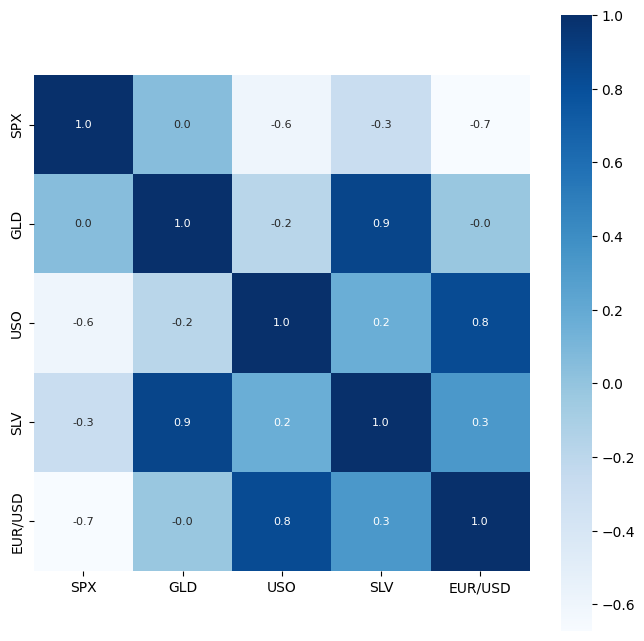

In [ ]:
#constructing heat map


plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


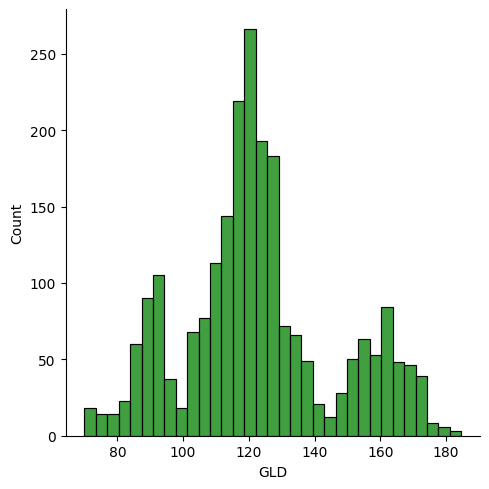

In [ ]:
#distribution of the gold proce

sns.displot(gold_data['GLD'],color='green')

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

MODEL TRAINING

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model

regressor.fit(X_train,Y_train)

RandomForestRegressor()

MODEL EVALUATION

In [ ]:
#prediction on test data

test_data_pred=regressor.predict(X_test)
test_data_pred

array([168.62689932,  81.57339978, 115.83550036, 127.61080058,
       120.58730099, 154.73449794, 150.27239834, 126.1210007 ,
       117.42229886, 125.96400079, 116.77770098, 171.35660095,
       141.77379856, 167.70759838, 115.0339    , 117.71470058,
       138.57050247, 170.49720114, 159.47950281, 158.67219975,
       155.05419972, 125.17959987, 175.73879972, 157.63280412,
       125.14800059,  93.89109976,  76.83800023, 120.32180008,
       119.05879914, 167.57870021,  88.11850066, 125.45680046,
        91.14130054, 117.68230071, 121.20289945, 136.2432012 ,
       115.48770129, 115.21620056, 148.25359988, 107.20970097,
       104.30120234,  87.06429785, 126.46040061, 117.92110011,
       154.28879898, 119.69350018, 108.37579986, 107.89249836,
        93.13660051, 127.13689802,  75.05890034, 113.54109887,
       121.24879996, 111.21039942, 118.96299906, 120.32379949,
       159.38690055, 170.19700182, 147.08619687,  85.93909876,
        94.4855003 ,  86.96049877,  90.47369973, 119.08

In [ ]:
#R squared error

RSQerror=metrics.r2_score(Y_test,test_data_pred)
RSQerror

0.9888929703604417

R SQUARED ERRO = 0-1  MODEL PERFORMING WELL

In [ ]:
#COMPARE THE ACTUAL VS PREDICTED

Y_test=list(Y_test)


Text(0, 0.5, 'Gold price')

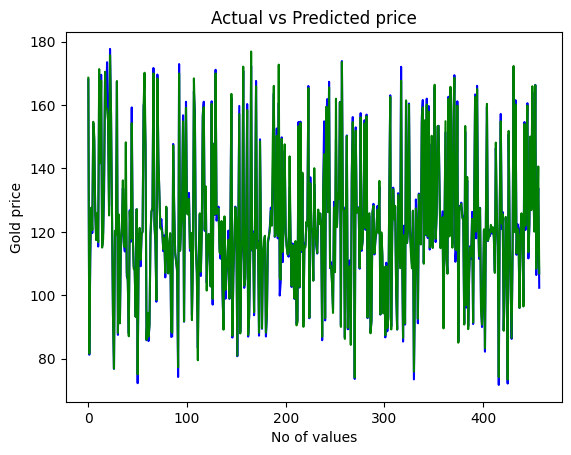

In [ ]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_pred,color='green',label='predicted value')
plt.title('Actual vs Predicted price')
plt.xlabel('No of values')
plt.ylabel('Gold price')
